# Iris Data Set

This is probably the most versatile, easy and resourceful dataset in pattern recognition literature. Nothing could be simpler than the Iris dataset to learn classification techniques. If you are totally new to data science, this is your start line. The data has only 150 rows & 4 columns.

## Problem: Predict the class of the flower based on available attributes.

# Explore the data

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import sys
sys.path.append('../hand_made_stuff')
from handmadestuff import fit_predict_report

In [2]:
# Converting dataset into dataframe
iris = datasets.load_iris()
df = pd.DataFrame(np.c_[iris.data, iris.target], 
                       columns = iris.feature_names + ['targets'])

In [3]:
from sklearn.preprocessing import StandardScaler
# Separating out the features
x = df.iloc[:, 0:4].values
# Separating out the target
y = df.iloc[:,4]
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [4]:
# PCA Projection to 2D
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)
principal_df = pd.DataFrame(data = principal_components, 
                           columns = ['principal component 1', 'principal component 2'])

In [5]:
principal_df.head()

,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [6]:
final_df = pd.concat([principal_df, y], axis = 1)
final_df.head()

,principal component 1,principal component 2,targets
0,-2.264542,0.505704,0.0
1,-2.086426,-0.655405,0.0
2,-2.367950,-0.318477,0.0
3,-2.304197,-0.575368,0.0
4,-2.388777,0.674767,0.0


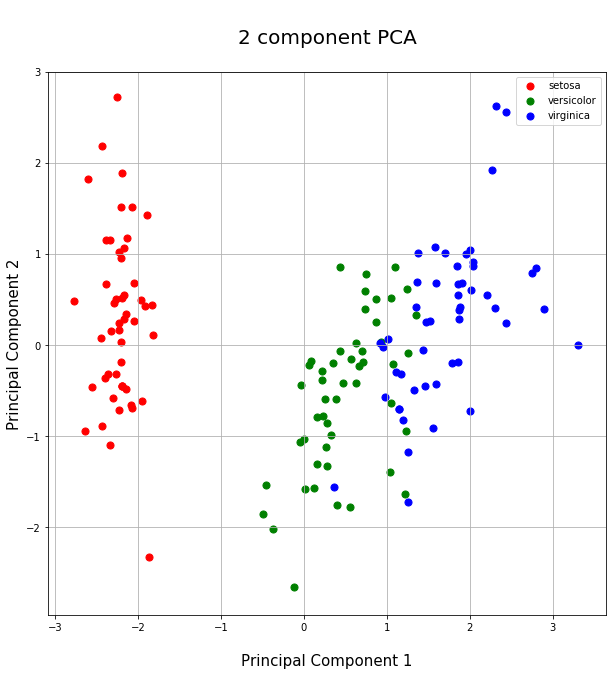

In [7]:
# Visualize 2D Projection
plt.figure(figsize = (10,10)) 
targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indices_to_keep = final_df['targets'] == target
    plt.scatter(final_df.loc[indices_to_keep, 'principal component 1'], 
                final_df.loc[indices_to_keep, 'principal component 2'], 
                c = color, s = 50)
plt.legend(iris.target_names)
plt.xlabel('\nPrincipal Component 1', fontsize = 15)
plt.ylabel('Principal Component 2', fontsize = 15)
plt.title('\n2 component PCA\n', fontsize = 20)
plt.grid()
plt.show()

# Applying different models to the dataset.
# With all features and after dimensionality reduction

## 4 features

In [8]:
# Splitting the 4-d dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train_4d, X_test_4d, y_train_4d, y_test_4d = train_test_split(x, y.values, 
                                                                test_size = 0.25, 
                                                                random_state = 0)

### KNN

In [9]:
# Using the function to reduce the amount of written code
fit_predict_report(iris, 'knn', X_train_4d, y_train_4d, X_test_4d, y_test_4d, n_neighbors = 5)

Classificator used:
 knn


Confusion matrix: 

 [[13  0  0]
 [ 0 15  1]
 [ 0  0  9]] 


Classification report:

              precision    recall  f1-score   support

        0.0       1.00      1.00      1.00        13
        1.0       1.00      0.94      0.97        16
        2.0       0.90      1.00      0.95         9

avg / total       0.98      0.97      0.97        38



In [10]:
# Full code to compare
# # Fitting classifier to the Training set
# from sklearn.neighbors import KNeighborsClassifier
# classifier_4d_knn = KNeighborsClassifier(n_neighbors = 5,
#                                          metric = 'minkowski',
#                                          p = 2)
# classifier_4d_knn.fit(X_train_4d, y_train_4d)

# # Predicting the Test set results
# y_pred_4d_knn = classifier_4d_knn.predict(X_test_4d)

# # Confusion matrix
# from sklearn.metrics import confusion_matrix
# cm_4d_knn = confusion_matrix(y_test_4d, y_pred_4d_knn)
# cm_4d_knn

# from sklearn.metrics import classification_report
# print(classification_report(y_test_4d, y_pred_4d_knn))

### SVC

In [11]:
# Function which appends a given kernel/C efficiency value to the list
def create_a_list_of_efficiencies(list_of_efficiencies, cm):
    actual_values_sum = 0
    for i in range(len(cm)):
        actual_values_sum += cm[i][i]
    list_of_efficiencies.append(actual_values_sum)
    return list_of_efficiencies

In [12]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
kernel_efficiencies = []
# Choosing the best kernel (not in the most effective way)
all_kernels = ['poly', 'rbf', 'sigmoid']
for kernel in all_kernels:
    
    # Fitting classifier to the Training set
    classifier_4d_svc = SVC(kernel = kernel)
    classifier_4d_svc.fit(X_train_4d, y_train_4d)
    
    # Predicting the Test set results
    y_pred_4d_svc = classifier_4d_svc.predict(X_test_4d)
    
    # Making the Confusion Matrix
    cm_4d_svc = confusion_matrix(y_test_4d, y_pred_4d_svc)
    
    # it is basically an overkill to have a dict with all efficiency values
    kernel_efficiencies = create_a_list_of_efficiencies(kernel_efficiencies, cm_4d_svc)
    
most_effective_kernel = all_kernels[kernel_efficiencies.index(max(kernel_efficiencies))]

In [13]:
C_efficiencies = []
# Defining the best C-value
for C in range(1, 100):
    
    # Fitting classifier to the Training set
    classifier_4d_svc = SVC(kernel = most_effective_kernel, C = C)
    classifier_4d_svc.fit(X_train_4d, y_train_4d)
    
    # Predicting the Test set results
    y_pred_4d_svc = classifier_4d_svc.predict(X_test_4d)
    
    # Making the Confusion Matrix
    cm_4d_svc = confusion_matrix(y_test_4d, y_pred_4d_svc)
    
    C_efficiencies = create_a_list_of_efficiencies(C_efficiencies, cm_4d_svc)

most_effective_C = C_efficiencies.index(max(C_efficiencies)) + 1

In [14]:
# Using the function to reduce the amount of written code
fit_predict_report(iris, 'svc', X_train_4d, y_train_4d, X_test_4d, y_test_4d, 
                   svc_kernel = most_effective_kernel, svc_c = most_effective_C)

Classificator used:
 svc


Confusion matrix: 

 [[13  0  0]
 [ 0 15  1]
 [ 0  0  9]] 


Classification report:

              precision    recall  f1-score   support

        0.0       1.00      1.00      1.00        13
        1.0       1.00      0.94      0.97        16
        2.0       0.90      1.00      0.95         9

avg / total       0.98      0.97      0.97        38



In [15]:
# Full code to compare
# # Fitting classifier with the optimal parameters to the Training set
# classifier_4d_svc = SVC(kernel = most_effective_kernel, C = most_effective_C)
# classifier_4d_svc.fit(X_train_4d, y_train_4d)

# # Predicting the Test set results
# y_pred_4d_svc = classifier_4d_svc.predict(X_test_4d)

# # Confusion matrix
# cm_4d_svc = confusion_matrix(y_test_4d, y_pred_4d_svc)
# cm_4d_svc

# print(classification_report(y_test_4d, y_pred_4d_svc))

### Logistic regression

In [16]:
# Using the function to reduce the amount of written code
fit_predict_report(iris, 'lr', X_train_4d, y_train_4d, X_test_4d, y_test_4d)

Classificator used:
 lr


Confusion matrix: 

 [[13  0  0]
 [ 0 10  6]
 [ 0  1  8]] 


Classification report:

              precision    recall  f1-score   support

        0.0       1.00      1.00      1.00        13
        1.0       0.91      0.62      0.74        16
        2.0       0.57      0.89      0.70         9

avg / total       0.86      0.82      0.82        38



In [17]:
# Full code to compare
# # Fitting Logistic Regression to the training set
# from sklearn.linear_model import LogisticRegression
# classifier_4d_lr = LogisticRegression(random_state = 0)
# classifier_4d_lr.fit(X_train_4d, y_train_4d)

# # Predicting the test set result
# y_pred_4d_lr = classifier_4d_lr.predict(X_test_4d)

# # Confusion matrix
# cm_4d_lr = confusion_matrix(y_test_4d, y_pred_4d_lr)
# cm_4d_lr

# print(classification_report(y_test_4d, y_pred_4d_lr))

## 2 features

In [18]:
# Splitting the 2-d dataset into the Training set and Test set
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(final_df.iloc[:, :2].values, 
                                                                final_df.iloc[:, 2].values, 
                                                                test_size = 0.25, 
                                                                random_state = 0)

### KNN

Classificator used:
 knn


Confusion matrix: 

 [[13  0  0]
 [ 0 13  3]
 [ 0  1  8]] 


Classification report:

              precision    recall  f1-score   support

        0.0       1.00      1.00      1.00        13
        1.0       0.93      0.81      0.87        16
        2.0       0.73      0.89      0.80         9

avg / total       0.91      0.89      0.90        38



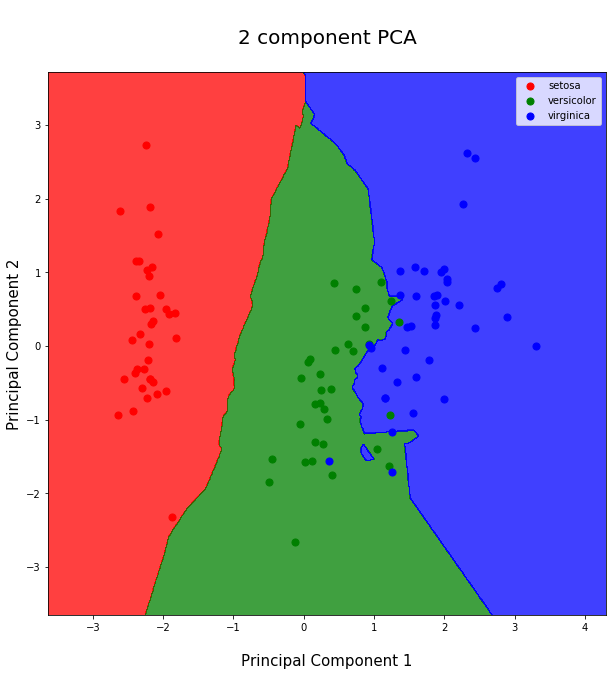

In [19]:
fit_predict_report(iris, 'knn', X_train_2d, y_train_2d, X_test_2d, y_test_2d, 
                    n_neighbors = 5, visualise =True)

In [20]:
# Full code to compare
# # Fitting classifier to the Training set
# from sklearn.neighbors import KNeighborsClassifier
# classifier_2d_knn = KNeighborsClassifier(n_neighbors = 5,
#                                          metric = 'minkowski',
#                                          p = 2)
# classifier_2d_knn.fit(X_train_2d, y_train_2d)

# # Predicting the Test set results
# y_pred_2d_knn = classifier_2d_knn.predict(X_test_2d)
# cm_2d_knn = confusion_matrix(y_test_2d, y_pred_2d_knn)
# cm_2d_knn

# print(classification_report(y_test_2d, y_pred_2d_knn))

# # Visualising the dataset
# visualise_classifier(classifier_2d_knn, X_train_2d, y_train_2d)

### SVC

In [21]:
kernel_efficiencies = []
# Choosing the best kernel (not in the most effective way)
all_kernels = ['poly', 'rbf', 'sigmoid']
for kernel in all_kernels:
    
    # Fitting classifier to the Training set
    classifier_2d_svc = SVC(kernel = kernel)
    classifier_2d_svc.fit(X_train_2d, y_train_2d)
    
    # Predicting the Test set results
    y_pred_2d_svc = classifier_2d_svc.predict(X_test_2d)
    
    # Making the Confusion Matrix
    cm_2d_svc = confusion_matrix(y_test_2d, y_pred_2d_svc)
    
    # it is basically an overkill to have a dict with all efficiency values
    kernel_efficiencies = create_a_list_of_efficiencies(kernel_efficiencies, cm_2d_svc)
    
most_effective_kernel = all_kernels[kernel_efficiencies.index(max(kernel_efficiencies))]

In [22]:
C_efficiencies = []
# Defining the best C-value
for C in range(1, 100):
    
    # Fitting classifier to the Training set
    classifier_2d_svc = SVC(kernel = most_effective_kernel, C = C)
    classifier_2d_svc.fit(X_train_2d, y_train_2d)
    
    # Predicting the Test set results
    y_pred_2d_svc = classifier_2d_svc.predict(X_test_2d)
    
    # Making the Confusion Matrix
    cm_2d_svc = confusion_matrix(y_test_2d, y_pred_2d_svc)
    
    C_efficiencies = create_a_list_of_efficiencies(C_efficiencies, cm_2d_svc)

most_effective_C = C_efficiencies.index(max(C_efficiencies)) + 1

Classificator used:
 svc


Confusion matrix: 

 [[13  0  0]
 [ 0 15  1]
 [ 0  2  7]] 


Classification report:

              precision    recall  f1-score   support

        0.0       1.00      1.00      1.00        13
        1.0       0.88      0.94      0.91        16
        2.0       0.88      0.78      0.82         9

avg / total       0.92      0.92      0.92        38



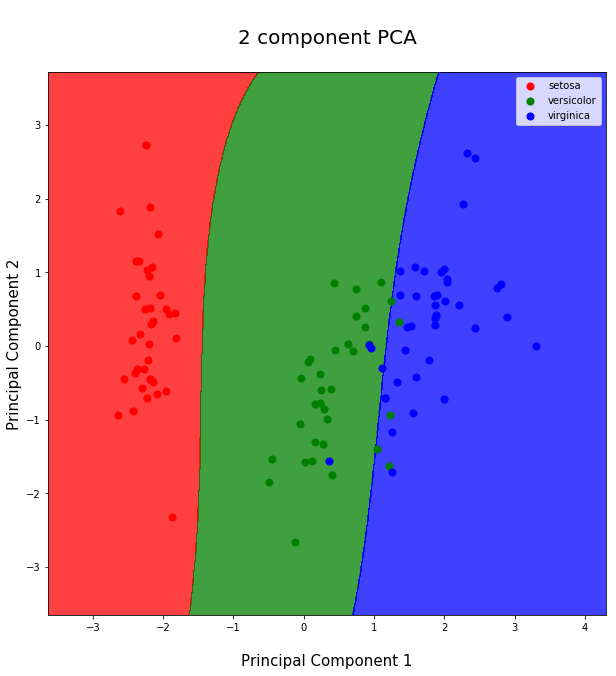

In [23]:
# Using the function to reduce the amount of written code
fit_predict_report(iris, 'svc', X_train_2d, y_train_2d, X_test_2d, y_test_2d, 
                   svc_kernel = most_effective_kernel, svc_c = most_effective_C,
                  visualise = True)

In [24]:
# Full code to compare
# # Fitting classifier with the optimal parameters to the Training set
# classifier_2d_svc = SVC(kernel = most_effective_kernel, C = most_effective_C)
# classifier_2d_svc.fit(X_train_2d, y_train_2d)

# # Predicting the Test set results
# y_pred_2d_svc = classifier_2d_svc.predict(X_test_2d)

# # Confusion matrix
# cm_2d_svc = confusion_matrix(y_test_2d, y_pred_2d_svc)
# cm_2d_svc

# print(classification_report(y_test_2d, y_pred_2d_svc))

# # Visualising the dataset
# visualise_classifier(classifier_2d_svc, X_train_2d, y_train_2d)

### Logistic regression

Classificator used:
 lr


Confusion matrix: 

 [[13  0  0]
 [ 0 10  6]
 [ 0  0  9]] 


Classification report:

              precision    recall  f1-score   support

        0.0       1.00      1.00      1.00        13
        1.0       1.00      0.62      0.77        16
        2.0       0.60      1.00      0.75         9

avg / total       0.91      0.84      0.84        38



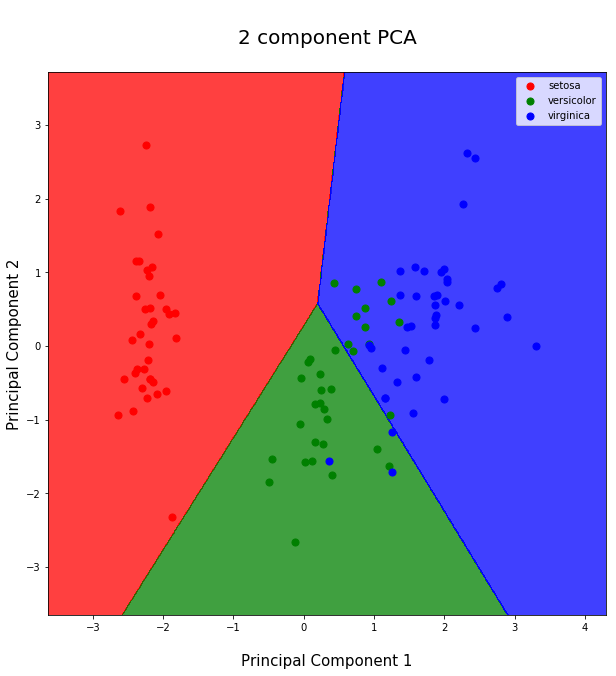

In [25]:
# Using the function to reduce the amount of written code
fit_predict_report(iris, 'lr', X_train_2d, y_train_2d, X_test_2d, y_test_2d, visualise = True)

In [26]:
# Full code to compare
# # Fitting Logistic Regression to the training set
# classifier_2d_lr = LogisticRegression(random_state = 0)
# classifier_2d_lr.fit(X_train_2d, y_train_2d)

# # Predicting the test set result
# y_pred_2d_lr = classifier_2d_lr.predict(X_test_2d)

# # Confusion matrix
# cm_2d_lr = confusion_matrix(y_test_2d, y_pred_2d_lr)
# cm_2d_lr

# print(classification_report(y_test_2d, y_pred_2d_lr))

# # Visualising the dataset
# visualise_classifier(classifier_2d_lr, X_train_2d, y_train_2d)